## 4　実践AI講座 第4回　データ分析(可視化/EDA)

今回もタイタニックデータを使用するので、前回と同様に読み込んでください。

**データセットの読み込み**  
1. `第4回/titanic.csv`をダウンロードし、自身のGoogleドライブの任意の場所にアップロード(前回やっていない場合)
2. 以下のセルを実行
```python
from google.colab import drive
drive.mount('/content/drive')
```
3. 「Googleドライブに接続」をクリック
4. 使用しているアカウントを選択し、「次へ」「続行」をクリック
5. リクエストに対して全て許可をクリックする。
6. 左の「ファイル」からアップロードした`titanic.csv`を探し、右クリックで「パスをコピー」をクリック
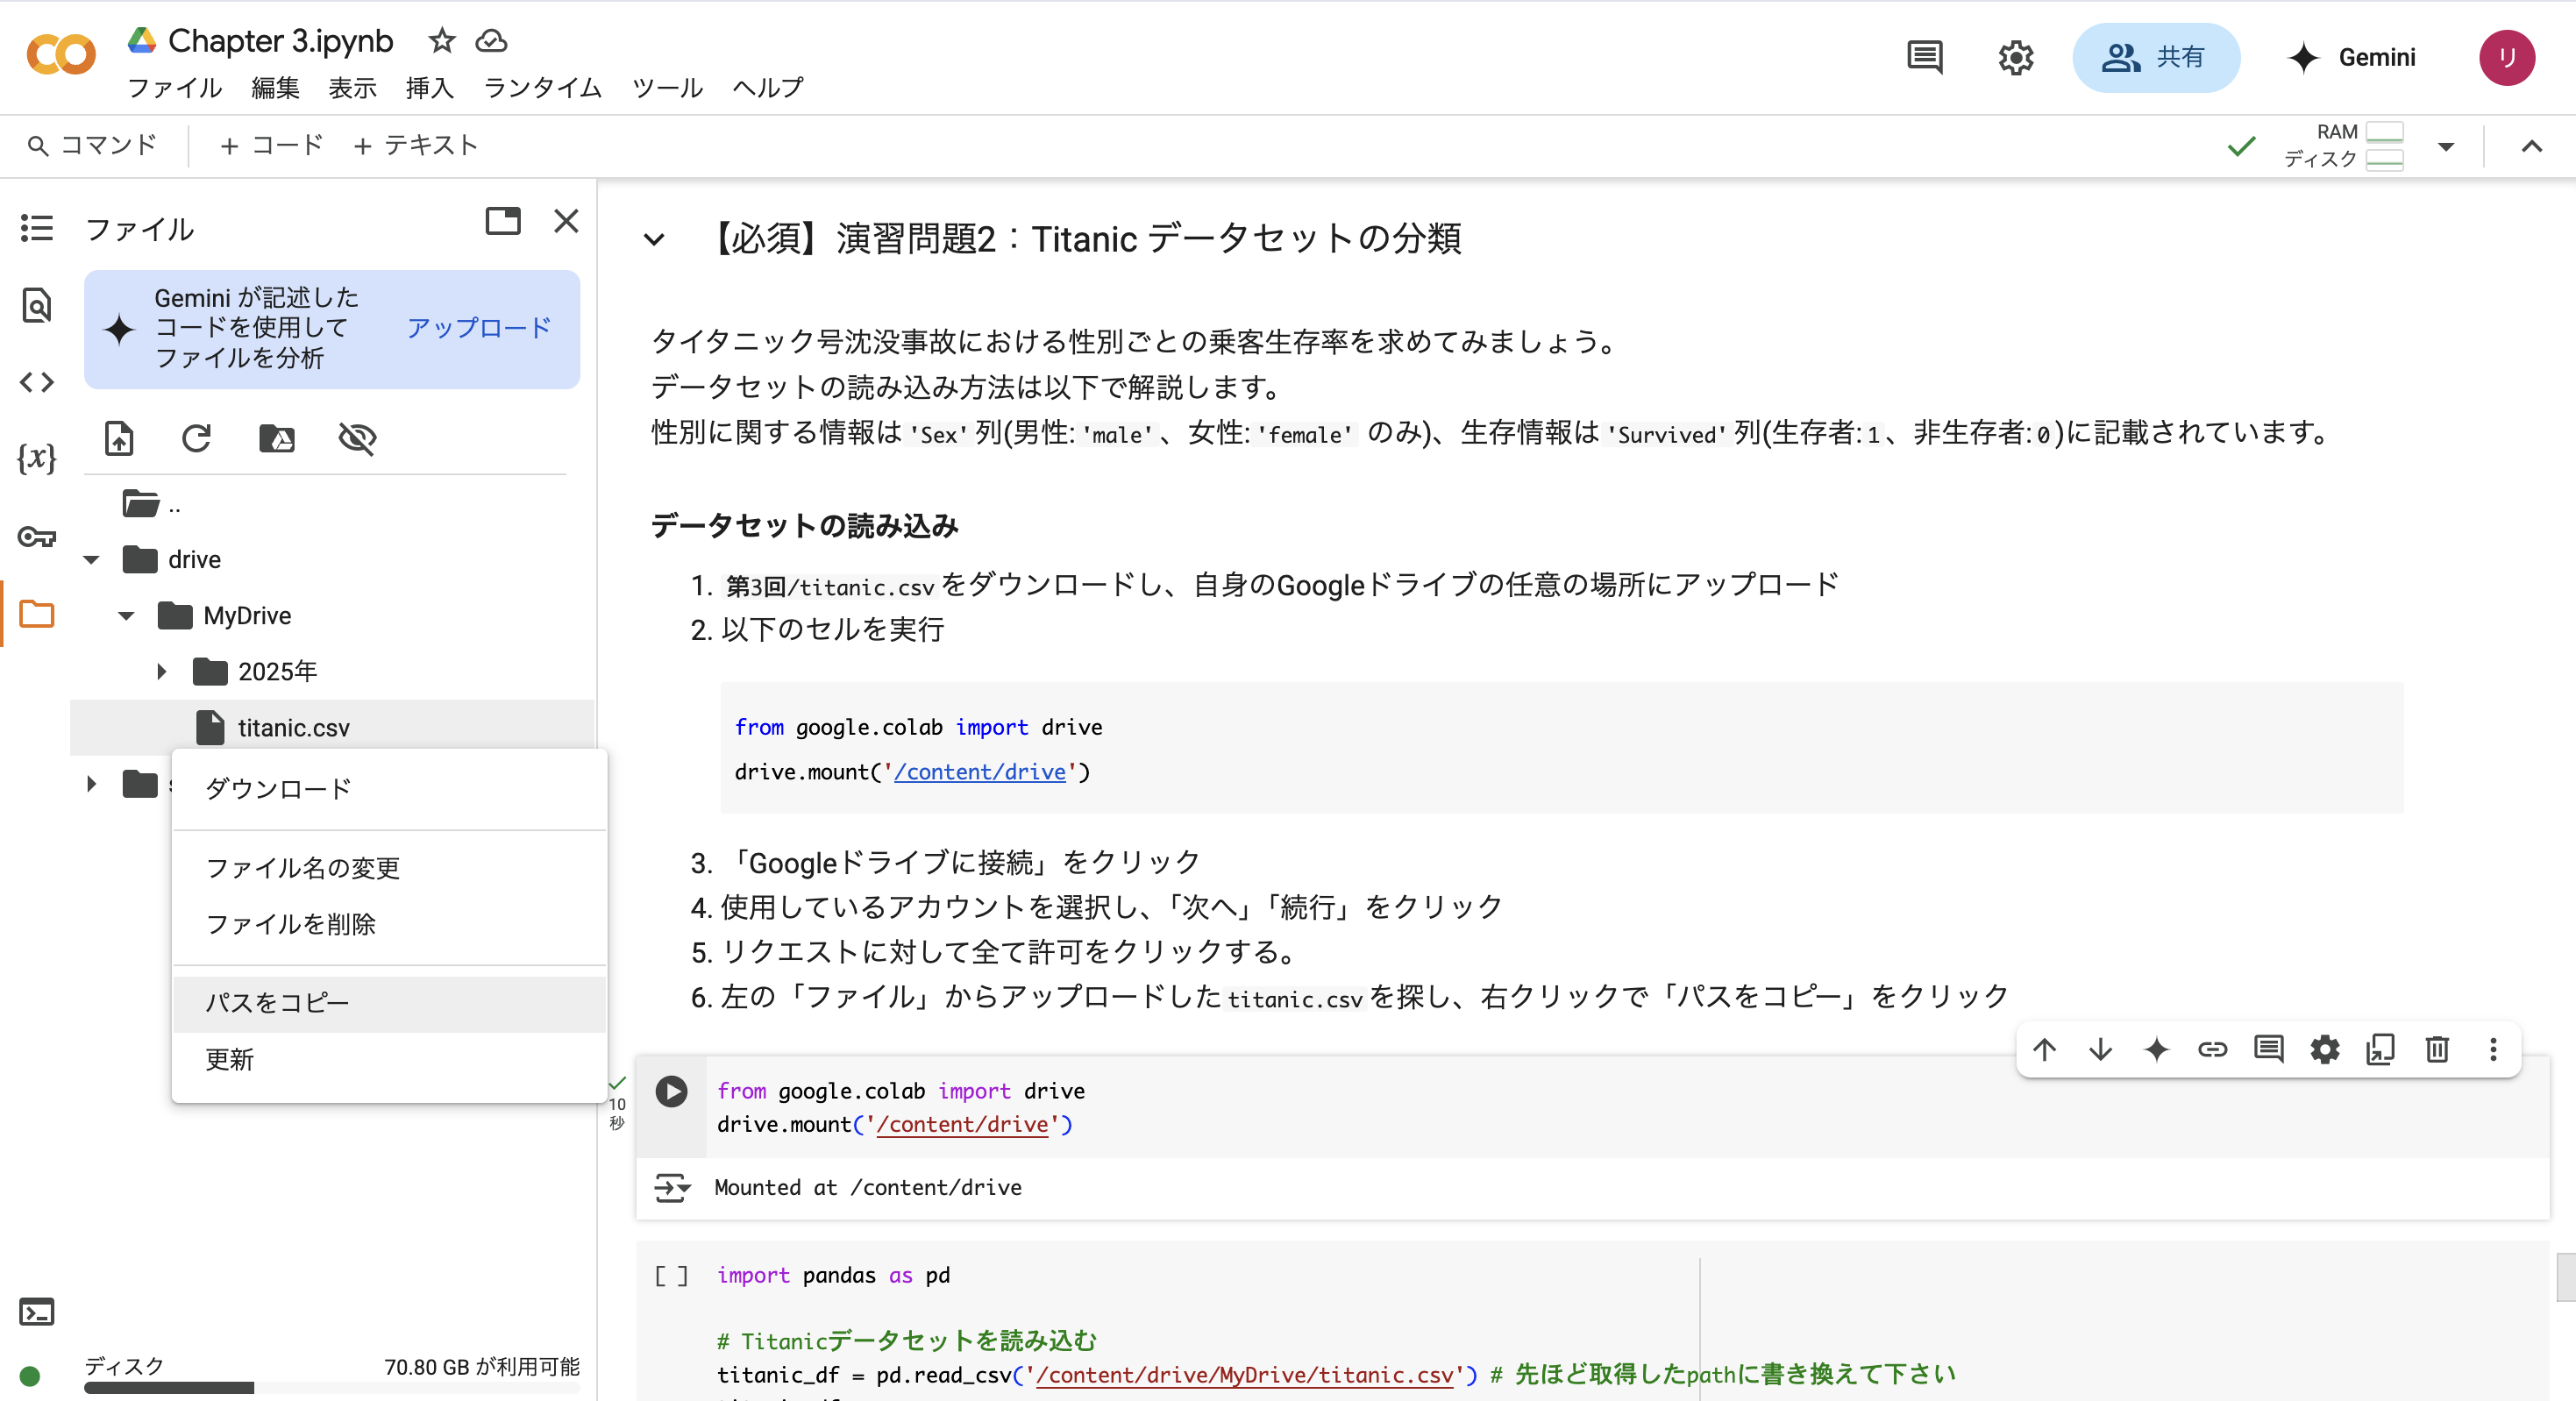

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import pandas as pd
# titanic_df = pd.read_csv('/content/drive/MyDrive/titanic.csv') # 先ほど取得したpathに書き換えて下さい
titanic_df = pd.read_csv('/tmp/work/git/ai-cource-practice/week4/titanic.csv') # 先ほど取得したpathに書き換えて下さい
titanic_df

# 4.1 Matplotlib

MatplotlibはPythonの基本的な可視化ツールです。この章では、Matplotlibの使い方を学びます。

## 4.1.1 折れ線グラフ

### 4.1.1.1 リストを用いた折れ線グラフの描き方

Matplotlibはimportすることで使用できるようになります。基本的には、Matplotlibの中のpyplotというものを、pltと名付けて使用します。
以下のセルでimportしてください。

In [ ]:
import matplotlib.pyplot as plt

`plt.plot`は引数にしたリストの値をそのまま折れ線グラフにします。

例えば、YouTube動画の視聴回数の推移を見たいとしましょう。毎日データを取り、3回、5回、8回、9回、14回と推移していたとすると、以下のように描画できます。

In [ ]:
plt.plot([3, 5, 8, 9, 14])

引数はリスト形式にする必要があることに気を付けてください。そのまま値を渡しても動きません。

In [ ]:
plt.plot(3, 5, 8, 9, 14)

xの値とyの値をセットで渡すこともできます。

例えば、YouTube動画の視聴回数のデータを適当に取っており、、3日目が3回、4日目が11回、5日目が14回、11日目が20回、13日目が20回というデータしかなかったとすると、以下のように描画できます。

In [ ]:
plt.plot([3, 4, 5, 11, 13], [3, 11, 14, 20, 20])

### 4.1.1.2 いろいろなデータ形式を用いた折れ線グラフの描き方

引数にはリストだけではなく、様々なデータ形式をとることができます。

In [ ]:
#タプルの場合
x = (2, 6.3, 8, 9, 11.5)
y = (5, 7, 8, 2.3, -5)
plt.plot(x, y)

In [ ]:
#numpy.ndarrayの場合
import numpy as np
x = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([0,1,4,9,16,25,36,49,64,81]) #二次関数
plt.plot(x, y)

In [ ]:
#pandas.DataFrameの場合
import pandas as pd
x = pd.DataFrame([2, 3, 4, 6, 1])
y = pd.DataFrame([3, 6, 8, 5, 2])
plt.plot(x, y)

### 4.1.1.3 高度なグラフの描き方

以下のように、グラフの書式を設定することができます。他にもいろいろな種類があるので、ぜひ調べてみてください。

In [ ]:
x = [1, 2, 5, 8, 4, 1]
y = [3, 5, 8, 3, 1, 2]
plt.plot(x, y, color='red', linestyle='--', marker='o',
        linewidth=5, markersize=10, markerfacecolor='blue')

グラフは、出力されるまで内部で保持されています。そのため、途中で重ね書きすることができます。

In [ ]:
plt.plot([0, 2, 3, 2, 0])
plt.plot([4, 7, 9, 10, 9, 7, 4])

ラベルを設定し、`plt.legend()`を実行することで、凡例を表示できます。

In [ ]:
plt.plot([0, 2, 3, 2, 0], label="small_mountain")
plt.plot([4, 7, 9, 10, 9, 7, 4], label="big_mountain")
plt.legend() #凡例の表示

x軸、y軸に名前を付けたり、グラフ全体にタイトルをつけることもできます。

In [ ]:
plt.plot([0, 2, 3, 2, 0])
plt.plot([4, 7, 9, 10, 9, 7, 4])
plt.xlabel('width')
plt.ylabel('height')
plt.title('mountains')

`plt.grid()`によってグリッド線をつけることもできます。

In [ ]:
plt.plot([0, 2, 3, 2, 0])
plt.plot([4, 7, 9, 10, 9, 7, 4])
plt.grid()

`plt.xlim`,`plt.ylim`によって表示の範囲を設定することもできます。これらをコメントアウトするとどうなるかも試してみてください。

In [ ]:
plt.plot([0,1,2,3,4,5,6,7,8,9,10000], [0,2,-1,3,-10000,2,3,-2,1,0,0]) #外れ値が含まれる
plt.xlim(0, 10) #x軸の範囲を設定
plt.ylim(-4, 4) #y軸の範囲を設定

他にも様々なことができます。ぜひ調べてみてください。

## 4.1.2 棒グラフ

`plt.bar`は棒グラフを作ることができます。

In [ ]:
fruits = ["apple", "banana", "orange", "grape"]
sold = [12, 20, 25, 6]
plt.bar(fruits, sold)

タイタニックデータの`Embarked(乗船した港)`の列について、棒グラフを作ってみましょう。

In [ ]:
titanic_df["Embarked"] #データの表示

In [ ]:
Embarked_count = titanic_df["Embarked"].value_counts() #各要素の数を数える
Embarked_count

In [ ]:
plt.bar(Embarked_count.index, Embarked_count)

## 4.1.3 散布図

`plt.scatter`は散布図を作ることができます。

In [ ]:
plt.scatter([1,3,6,3,4,2,6,4,4,2], [2,3,8,5,7,1,-1,-2,3,5])

In [ ]:
x = np.random.random(100) #0以上1以下の乱数を100個生成
y = np.random.random(100) #0以上1以下の乱数を100個生成
plt.scatter(x, y)

タイタニックデータの`Age(年齢)`と`Fare(運賃)`の関係を見てみましょう。

In [ ]:
titanic_df["Age"] #データの表示

In [ ]:
titanic_df["Fare"] #データの表示

In [ ]:
plt.scatter(titanic_df["Age"], titanic_df["Fare"], alpha=0.2) #alpha : 透明度
plt.xlabel("Age")
plt.ylabel("Fare")

## 4.1.4 ヒストグラム

`plt.hist`はヒストグラムを作ることができます。

In [ ]:
x = np.random.random(1000) #0以上1以下の乱数を1000個生成
plt.hist(x)

`plt.hist`の引数`bins`で分割数を指定できます。

In [ ]:
x = np.random.random(1000) #0以上1以下の乱数を1000個生成
plt.hist(x, bins=50) #分割数を50に設定

**[練習]** タイタニックデータの`Fare(運賃)`のヒストグラムを作成してください。(課題ではありません)

In [ ]:
#ここに入力

# 4.2 Seaborn

SeabornはMatplotlibをベースとし、さらに使いやすくしたような可視化ツールで、特にPandasと組み合わせると使いやすいです。覚えることは多いですが、一度覚えてしまえばMatplotlibよりずっと楽に可視化を行えます！

## 4.2.1 Seabornによる折れ線グラフ

`seaborn`は`sns`として`import`することが多いです。

In [ ]:
import seaborn as sns

`sns.lineplot`は折れ線グラフを作ります。まずは、実験用のデータを準備します。

In [ ]:
#各月の企業の利益に関する架空のデータを作成
profit_df = pd.DataFrame({"Company A":[67, 73, 77, 63, 57, 53, 47, 56, 66, 73, 79, 71],
            "Company B":[33, 35, 47, 43, 51, 57, 61, 60, 53, 62, 67, 72],
            "Company C":[120, 119, 122, 125, 119, 129, 131, 120, 118, 123, 131, 124],
            "Company D":[-19, -11, -3, -5, -6, 1, -3, 5, 3, 2, -3, -7]})
profit_df

このような、整った形のデータがあれば、引数`data`に入力するだけで、それをうまく折れ線グラフにしてくれます。

In [ ]:
sns.lineplot(data=profit_df)

Matplotlibと組み合わせることもできます。

In [ ]:
sns.lineplot(data=profit_df)
plt.grid()
plt.title("Company Profits")

`pandas.DataFrame`のデータの切り出し機能を使えば一部のデータのみで描画することができます。

In [ ]:
sns.lineplot(data=profit_df[["Company A", "Company B"]])

横軸は、`DataFrame`の`index`に対応しています。そのため、例えば、6,7,8月のデータを損失してしまった場合は、以下のように`index`を指定することでうまく描画できます。

In [ ]:
#各月の企業の利益に関する架空のデータを作成
profit_df = pd.DataFrame({"Company A":[67, 73, 77, 63, 57, 66, 73, 79, 71],
            "Company B":[33, 35, 47, 43, 51, 53, 62, 67, 72],
            "Company C":[120, 119, 122, 125, 119, 118, 123, 131, 124],
            "Company D":[-19, -11, -3, -5, -6, 3, 2, -3, -7]},
            index=[1,2,3,4,5,9,10,11,12])
profit_df

In [ ]:
sns.lineplot(data=profit_df)

## 4.2.2 Seabornによる棒グラフ

このセクションでは、収入についてのデータを使用します。

以下のコードはデータを読み込むためのものです。今理解する必要はありません。

In [ ]:
from sklearn.datasets import fetch_openml

adult = fetch_openml(name="adult", version=2, as_frame=True)
adult_df = adult.frame
adult_df

データセット内の、`workclass`について棒グラフを作成してみましょう。

まずは、各要素の数を数えます。

In [ ]:
adult_df_workclass = adult_df["workclass"].value_counts()
adult_df_workclass

次に、これを`sns.barplot`を用いて棒グラフにします。`plt.bar`の時とは違い、データをそのまま入れられます。

In [ ]:
plt.figure(figsize=(12, 4)) #描画のサイズを設定します。コメントアウトするとどうなるか、試してみてください。
sns.barplot(data=adult_df_workclass)

このままでは`Never-worked`と`Without-pay`が小さすぎて見えないので、引数`log`に`True`を指定することで、対数スケールにしてみましょう。

In [ ]:
plt.figure(figsize=(12, 4))
sns.barplot(data=adult_df_workclass, log=True)

もちろん、重ねて表示することもできます。

In [ ]:
plt.figure(figsize=(12, 4))
sns.barplot(data=adult_df.loc[adult_df["sex"]=="Male", "workclass"].value_counts(), log=True)
sns.barplot(data=adult_df.loc[adult_df["sex"]=="Female", "workclass"].value_counts(), log=True)

## 4.2.3 Seabornによる散布図

このセクションでは、ワインについてのデータを使用します。

以下のコードはデータを読み込むためのものです。今理解する必要はありません。

In [ ]:
wine = fetch_openml(name="wine", version=1, as_frame=True)
wine_df = wine.frame
wine_df

データセット内の、`Alcohol(アルコール濃度)`と`Malic_acid(リンゴ酸濃度)`について散布図を作成してみましょう。

`sns.scatterplot`の`data`引数にデータを入力し、`x, y`引数でどの列とどの列の組み合わせで散布図を作るかを指定します。

In [ ]:
sns.scatterplot(data=wine_df, x="Alcohol", y="Malic_acid")

データセットの`class`列はワインの種類を表します。引数`hue`に"class"を入力すると、ワインの種類ごとに分けて散布図を描いてくれます。

In [ ]:
sns.scatterplot(data=wine_df, x="Alcohol", y="Malic_acid", hue="class")

引数`hue`には、データの`class`列を直接入れることもできます。

In [ ]:
sns.scatterplot(data=wine_df, x="Alcohol", y="Malic_acid", hue=wine_df["class"])

他の組み合わせも試してみましょう。

In [ ]:
sns.scatterplot(data=wine_df, x="Flavanoids", y="Total_phenols")

`sns.lmplot`は近似直線も描いてくれます。

In [ ]:
sns.lmplot(data=wine_df, x="Flavanoids", y="Total_phenols")

ワインの種類ごとの描画もしてみましょう。

In [ ]:
sns.lmplot(data=wine_df, x="Flavanoids", y="Total_phenols", hue="class")

## 4.2.4 Seabornによるヒストグラム

このセクションでは、カリフォルニアの住宅価格についてのデータを使用します。

以下のコードはデータを読み込むためのものです。今理解する必要はありません。

In [ ]:
california = fetch_openml(name="california", version=2, as_frame=True)
california_df = california.frame
california_df

データセット内の、`price(住宅価格)`についてヒストグラムを作成してみましょう。

`sns.histplot`の`data`引数にデータを入力し、`x`引数でどの列でヒストグラムを作るかを指定します。

In [ ]:
sns.histplot(data=california_df, x="price")

`sns.kdeplot`はヒストグラムを滑らかにしたものを描画します。

In [ ]:
sns.kdeplot(data=california_df, x="price")

`sns.jointplot`は2つの列の散布図にヒストグラムをつけて表示します。

In [ ]:
sns.jointplot(data=california_df, x="price", y="MedInc")

このままでは見づらいので、`kind="kde"`として滑らかにしましょう。

In [ ]:
sns.jointplot(data=california_df, x="price", y="MedInc", kind="kde")

**[練習(ハイレベル)]** カリフォルニア住宅価格データの`price`のヒストグラムを、HouseAgeが30未満の部分と30以上の部分に分けて作成してください。(課題ではありません)

In [ ]:
#ここに入力

## 4.2.5 Seabornによる箱ひげ図

このセクションでは、糖尿病についてのデータを使用します。

以下のコードはデータを読み込むためのものです。今理解する必要はありません。

In [ ]:
diabetes = fetch_openml(name="diabetes", version=1, as_frame=True)
diabetes_df = diabetes.frame
diabetes_df

データセット内の、`mass(体格指数)`について箱ひげ図を作成してみましょう。

`sns.boxplot`の`data`引数にデータを入力し、`y`引数でどの列の箱ひげ図を作るかを指定します。

In [ ]:
sns.boxplot(data=diabetes_df, y="mass")

ここで、通常の箱ひげ図と違い、最大値の上や最小値の下にいくつか点が表示されていますが、これらはほかのデータから大きく離れており、外れ値とみなされるものを示しています。

次に、引数`x`に`"class"`を渡し、classが`tested_positive(陽性)`のものと`tested_negative(陰性)`のもので別々の箱ひげ図を作成してみましょう。

In [ ]:
sns.boxplot(data=diabetes_df, x="class", y="mass")

## 4.2.6 その他の機能

### スウォームプロット

`sns.swarmplot`はカテゴリごとにデータの分布を調べられます。

ためしに、ワインの種類ごとにアルコール濃度がどのように分布しているかを見てみます。

In [ ]:
sns.swarmplot(data=wine_df, x="class", y="Alcohol")

`sns.histplot`でも似たことができます。

In [ ]:
sns.histplot(data=wine_df, x="Alcohol", hue="class")

### ヒートマップ

`sns.heatmap`は小規模データを色によって見やすくしてくれます。

In [ ]:
sns.heatmap([[1, 2, 3],
                     [0, -1, 1],
                     [-1,-3,2]])

ためしに、ワインデータの相関係数行列をヒートマップで可視化してみましょう。これにより、相関係数が大きいところを簡単に見つけられます。相関係数行列とは、データのあらゆる組み合わせについて、相関係数を求めて並べたものです。

In [ ]:
wine_df_corr = wine_df.corr() #相関係数行列を計算
wine_df_corr

相関係数行列の読み方は、例えば、左から3番目、上から2番目は`Alcohol`と`Malic_acid`の相関係数、といった具合です。

In [ ]:
sns.heatmap(wine_df.corr())

Seabornには他にも様々なツールがあります。ぜひ調べて見てください！

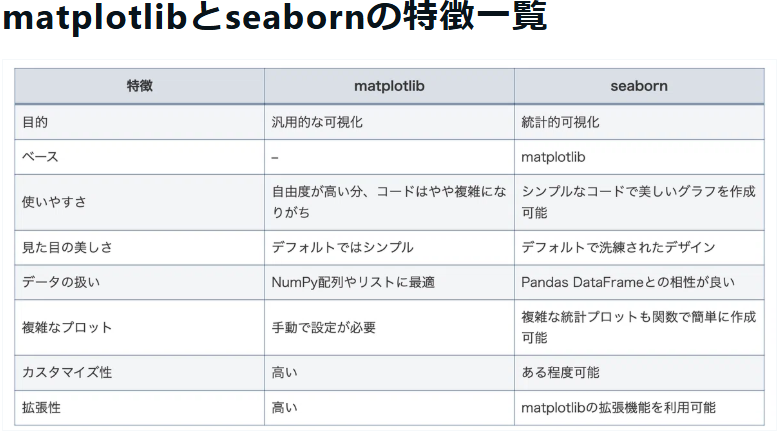

画像：https://note.com/js2iiu/n/nbbbfee342e53

# 4.3 EDA(探索的データ分析)

EDAはデータをいろいろな方法で可視化したり、分散や相関係数などを調べたりすることで、データに対する理解を深めることを目指すものです。実は、今までのセクションで行ってきたデータの可視化は、全てEDAのやり方の一部でした。そのため、このセクションでは、他のEDA手法を扱います。

このセクションではもう一度タイタニックのデータを扱います。途中で中断してしまった場合は、一番上に戻って再度データをロードしてください。

### info

`pd.DataFrame`には`info`という関数があり、各列の基本情報を教えてくれます。

In [ ]:
titanic_df.info()

non-nullは欠損値ではない値の数を意味します。また、Dtypeは、`int64`が整数、`float64`が実数、`object`が文字列を意味します。

ここから、`Pclass`列には欠損値がなく、値は整数、`Cabin`には多くの欠損値があり、値は文字列であるというようなことが読み取れます。

### describe

`describe`関数は数値データの列について、基本的な統計量をまとめて表示してくれます。

In [ ]:
titanic_df.describe()

countはデータ数、stdは標準偏差を意味します。

### nunique

`nunique`関数は各列について、データの種類の数を教えてくれます。

In [ ]:
titanic_df.nunique()

ここから、`Survived`は生存か死亡の2種類のみ、`Pclass`は3種類、`Name`は全員異なる、などの情報が得られます。

### corr

4.2.5と内容がかぶりますが、`corr`関数は数値データ同士の相関係数行列を計算してくれます。ただし、`describe`関数と異なり、こちらで数値データの列を選んであげる必要があることに注意してください。

In [ ]:
titanic_df.corr() #文字列型の列(Nameなど)が含まれる

In [ ]:
titanic_df[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr() #数値データの列のみを抽出

### 散布図とヒストグラムを一気に描画

`pandas.plotting`の`scatter_matrix`は、数値データの列について、散布図をあらゆる組み合わせで作成してくれます。また、同じ列同士の散布図が直線になるのはわかりきっているので、そこにはヒストグラムを描いてくれます。

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(titanic_df, figsize=(10, 10))

In [ ]:
scatter_matrix(wine_df, figsize=(20, 20))

少し時間がかかりますが、`sns.pairplot`でも同じことができ、さらにカテゴリごとの色分けもできます。

In [ ]:
sns.pairplot(wine_df, hue="class")

# 4.4 課題
今回の課題は以下の2点になります。
- 感想フォームの提出  
https://docs.google.com/forms/d/e/1FAIpQLSdPnWL6x09kUqBSWGRjfbeqQJTJoOd7dgBsyCNp865Fri_LzA/viewform?usp=header
- 自身のリポジトリに第四回演習問題の回答リンクを追記 (詳細は以下参照)

## 演習問題の提出方法
第一回で作成した本講座用の公開レポジトリに以下のように`week4`ディレクトリを作成して下さい。その中に`README.md`を作成し、演習問題に取り組んだColabノートブックのリンクを記載して下さい。ノートブックは問題ごとに分けて下さい。

```plaintext
your-repository-name/     <--  第一回で作成   ex) ai-course-practice
├── README.md          <--  第一回で作成
├── week1/             <--  第一回で作成
├── week2/             <--  第二回で作成
├── week3/             <--  第三回で作成
│
└── week4/             <--  今回作成
     └── README.md     <--  演習問題の回答リンクを記載
```

## 演習問題の内容

###【必須】演習問題1：基本的なグラフの作り方 (4.1.1節参照)

`matplotlib.pyplot`を用い、以下のデータを、`months`を横軸、`temperature`を縦軸にとって折れ線グラフにしてください。

ノートブック名：`01_simpleplot.ipynb`

In [ ]:
months = [1, 2, 3, 4, 5, 8, 9, 10, 11, 12]
temperature = [-4, -3, 1, 7, 11, 15, 14, 10, 9, 3]

In [ ]:
import matplotlib.pyplot as plt

#ここに入力

###【必須】演習問題2：Irisデータセットの可視化 (4.2.3節参照)

Irisデータセットは、3種類のアヤメという花のデータを集めたものです。がく片の長さ、幅、花弁の長さ、幅のデータが入っています。

以下のコードはデータを読み込むためのものです。今理解する必要はありません。

In [ ]:
from sklearn.datasets import fetch_openml
iris = fetch_openml(name="iris", version=1, as_frame=True)
iris_df = iris.frame
iris_df

`seaborn`を用いて、三種類の`class`ごとに`sepallength`と`petallength`の散布図を描いてください。

ノートブック名：`02_iris_1.ipynb`

In [ ]:
import seaborn as sns

#ここに入力

###【任意】演習問題3：円の描画

`plt.plot`を用いて円を描いてみましょう。

`np.linspace(a, b, n)` (aからbまでの間のn個の値を並べる関数)を使うと良いです。

難しいと感じたら、下のヒントを見てください。

ノートブック名：`03_circle_plot.ipynb`

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#ここに入力

<details>
<summary>[ヒント]</summary>

x = np.linspace(-1, 1, 1000)とし、上側の半円$y=\sqrt{1-x^2}$と下側の半円$y=-\sqrt{1-x^2}$を両方プロットしましょう。

</details>

<details>
<summary>[ヒント(理系向け)]</summary>

t = np.linspace(0, 2*np.pi, 1000)とし、円のパラメータ表示$x=\cos t, y=\sin t$を用いましょう。

</details>

###【任意】演習問題4：IrisデータセットのEDA

演習問題2でやったもの以外の様々なデータ分析をやってみましょう。何をしたらよいかわからなかったら、下のヒントを見てください。

ノートブック名：`04_iris_2.ipynb`

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
iris = fetch_openml(name="iris", version=1, as_frame=True)
iris_df = iris.frame
iris_df

#ここに入力

<details>
<summary>[ヒント]</summary>

例：

1.   演習問題2で描いた散布図以外の組み合わせで、同様に散布図を描いてみましょう。
2.   各列について、ヒストグラムを描いてみましょう。
3.   `pandas.DataFrame`の`describe`関数を用い、基本的な統計量を計算してみましょう。
4.   `pandas.DataFrame`の`corr`関数と`sns.heatmap`を用い、各列間の相関係数を可視化してみましょう。

</details>